# Задание по программированию: 
## Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

In [1]:
import re
import numpy as np 
import pandas as pd
from scipy.spatial import distance

In [2]:
file = open('sentences.txt')
sentences = file.readlines()

In [3]:
sentences[:5]

['In comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n',
 'A common interactive use of cat for a single file is to output the content of a file to standard output.\n',
 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n',
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n']

In [4]:
tokens = list(map(lambda x:  x.lower().strip(), sentences))

In [5]:
def Tokenization(x):
    tokenized_x = []
    tokens = []
    for ix in x:
        ix = re.split('[^a-z]', ix.lower().strip())
        ix = [elem for elem in ix if elem != '']
        tokenized_x.append(ix)
        for elem in ix:
            tokens.append(elem)
    return tokenized_x, tokens

In [6]:
tokenized_sentences, tokens = Tokenization(sentences)

In [7]:
def Making_dict(x):
    """Return dict with set values and keys as indexes"""
    b = set(x)
    d = {}
    i = 0
    for elem in b:
        d[i] = elem
        i+=1
    return  d

In [8]:
new_dict = Making_dict(tokens)
num_sen = len(sentences)
num_dict = len(new_dict)

In [9]:
matrix = np.zeros((num_sen,num_dict))

In [10]:
#filling matrix
for i in range(num_sen):
    for k, v in new_dict.items():
        matrix[i][int(k)] = tokenized_sentences[i].count(v)        

In [11]:
dists_list = np.zeros((num_sen,))

In [12]:
for i in range(num_sen):
    dists_list[i] = distance.cosine(matrix[0], matrix[i])

In [13]:
dists_list

array([0.        , 0.95275444, 0.86447381, 0.89517152, 0.77708871,
       0.94023857, 0.73273876, 0.92587507, 0.88427249, 0.90550888,
       0.83281654, 0.88047714, 0.83964325, 0.87035926, 0.87401184,
       0.94427218, 0.84063619, 0.9566445 , 0.94427218, 0.88854436,
       0.84275727, 0.82503645])

In [14]:
d = {'distance': dists_list, 'sentences': sentences}
df = pd.DataFrame(data=d)

In [15]:
df.head()

,distance,sentences
0,0.000000,"In comparison to dogs, cats have not undergone..."
1,0.952754,"As cat simply catenates streams of bytes, it c..."
2,0.864474,A common interactive use of cat for a single f...
3,0.895172,Cats can hear sounds too faint or too high in ...
4,0.777089,"In one, people deliberately tamed cats in a pr..."


In [16]:
df.sort_values('distance')

,distance,sentences
0,0.000000,"In comparison to dogs, cats have not undergone..."
6,0.732739,Domestic cats are similar in size to the other...
4,0.777089,"In one, people deliberately tamed cats in a pr..."
21,0.825036,"The fifth major update to Mac OS X, Leopard, c..."
10,0.832817,Cat command is one of the basic commands that ...
12,0.839643,When you type simply cat command without any a...
16,0.840636,Since Apple moved to using Intel processors in...
20,0.842757,"Mac OS X Mountain Lion installs in place, so y..."
2,0.864474,A common interactive use of cat for a single f...
13,0.870359,"Leopard was released on October 26, 2007 as th..."


## Задача 2: аппроксимация функции

In [17]:
%matplotlib inline
from matplotlib import pylab as plt

In [18]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)  

In [19]:
x_sol = np.linspace(1, 15)
y_sol = f(x_sol)

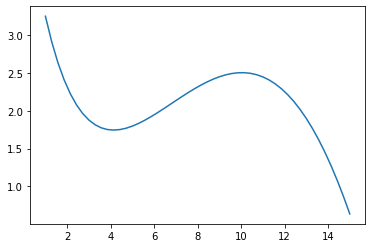

In [20]:
plt.plot(x_sol, y_sol)
plt.show()

Решение с помощью линейных уравнений

In [21]:
x_1 = 1
x_2 = 15

In [22]:
A = np.array([[1,x_1],[1, x_2]])
b = np.array([f(x_1),f(x_2)])
w = np.linalg.solve(A, b)

In [23]:
A

array([[ 1,  1],
       [ 1, 15]])

In [24]:
b

array([3.25221687, 0.63522142])

In [25]:
w

array([ 3.43914511, -0.18692825])

In [26]:
def lin_aprox(A,w):
    return np.dot(A,w)

In [27]:
y_lin = lin_aprox(A,w)

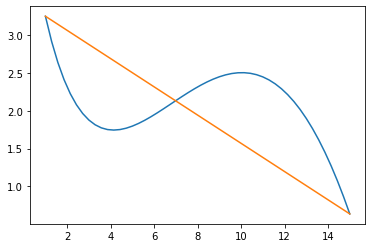

In [28]:
plt.plot(x_sol,y_sol)
plt.plot([x_1,x_2],y_lin)
plt.show()

Решение с помощью квадратичных уравнений

In [29]:
x_1 = 1
x_2 = 8
x_3 = 15

In [30]:
A = np.array([[1,x_1,x_1**2],[1,x_2,x_2**2], [1,x_3,x_3**2]])
b = np.array([f(x_1),f(x_2),f(x_3)])
w = np.linalg.solve(A, b)

In [31]:
A 

array([[  1,   1,   1],
       [  1,   8,  64],
       [  1,  15, 225]])

In [32]:
b

array([3.25221687, 2.31617016, 0.63522142])

In [33]:
w

array([ 3.32512949, -0.06531159, -0.00760104])

In [34]:
def sq_aprox(x, w):
    return w[0] +w[1] * x + w[2] * (x ** 2)

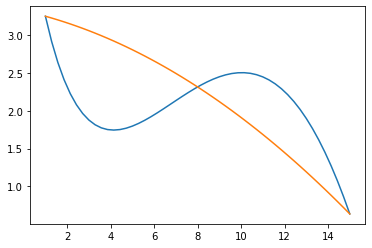

In [35]:
plt.plot(x_sol,y_sol)
plt.plot(x_sol, sq_aprox(x_sol, w))
plt.show()

Решение с помощью кубических уравнений

In [36]:
x = np.array([1,4,10,15])

In [37]:
A = np.array([[1,x[0],x[0]**2,x[0]**3],[1,x[1],x[1]**2,x[1]**3], [1,x[2],x[2]**2,x[2]**3],[1,x[3],x[3]**2,x[3]**3]])
b = np.array([f(x[0]), f(x[1]), f(x[2]), f(x[3])])
w = np.linalg.solve(A, b)


In [38]:
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [39]:
np.round(w,2)

array([ 4.36, -1.3 ,  0.19, -0.01])

In [40]:
def cube_aprox(x, w):
    return w[0] +w[1] * x + w[2] * (x ** 2)+ w[3] * (x ** 3)

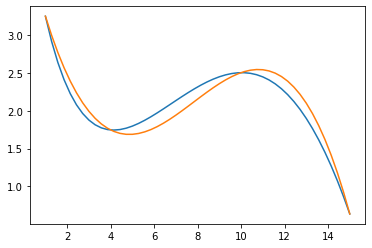

In [41]:
plt.plot(x_sol,y_sol)
plt.plot(x_sol, cube_aprox(x_sol, w))
plt.show()